In [8]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('chirps2.csv')

In [11]:
data.head()

,X,Y
0,88.599998,19
1,71.599998,16
2,93.300003,22
3,84.300003,17
4,80.599998,19


In [6]:
print(data)

              X   Y
0     88.599998  19
1     71.599998  16
2     93.300003  22
3     84.300003  17
4     80.599998  19
...         ...  ..
1494  81.000000  17
1495  81.000000  17
1496  86.000000  17
1497  83.000000  20
1498  72.000000  16

[1499 rows x 2 columns]


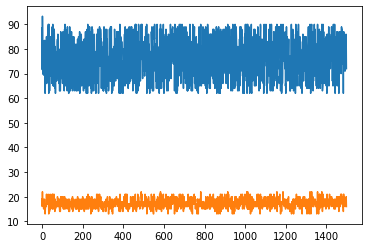

In [9]:
plt.plot(data)

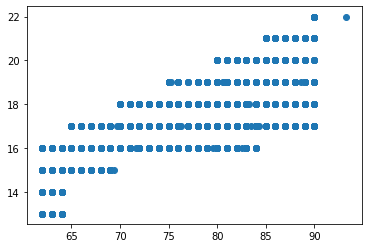

In [14]:
plt.scatter(data.X, data.Y)

<BarContainer object of 1499 artists>

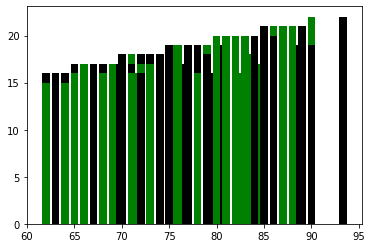

In [24]:
plt.bar(data.X, data.Y, color=['black', 'green'])